In [1]:
# boiler place
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.enable_eager_execution()

print(tf.executing_eagerly())

True


In [2]:
# forgot..
from collections import Counter

In [3]:
# again forgot
import pickle

In [4]:
# data from earlier
with open('models/2019-05-19T001217-UTC-outdata.pkl', 'rb') as fd: outdata = pickle.load(fd)

In [5]:
import mytf.utils as mu

In [6]:
from importlib import reload

In [7]:
# 2019-06-16 22:32 UTC 
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64,  dropout=0.2, recurrent_dropout=0.2,
                input_shape=(None, 1)
              ),
    # 4 because 'A', 'B', 'C', 'D'.
    tf.keras.layers.Dense(4)
])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [8]:
reload(mu)

<module 'mytf.utils' from '/Users/michal/LeDropbox/Dropbox/Code/Kaggle/reducing-commercial-aviation-fatalities/mytf/utils.py'>

In [9]:
%time training_indices = \
        mu.choose_training_indices(outdata, [10000, 7689, 10000, 20000])


CPU times: user 3.95 s, sys: 24.7 ms, total: 3.98 s
Wall time: 4 s


In [10]:
training_indices.keys()

dict_keys([0, 1, 2, 3])

In [12]:
training_groups = training_indices
training_indices = training_groups[0] + training_groups[1]\
                    + training_groups[2] + training_groups[3]

In [13]:
len(training_indices)

47689

In [36]:
reload(mu)

<module 'mytf.utils' from '/Users/michal/LeDropbox/Dropbox/Code/Kaggle/reducing-commercial-aviation-fatalities/mytf/utils.py'>

In [23]:
import ipdb

In [27]:
#Hand-tuned ... 
class_weights = {0: 0.1, 1: 0.5, 2: 0.1, 3: 0.3}

%time dataset_batches = mu.build_dataset_weighty(  \
    outdata, training_indices, class_weights, \
        batch_size=1000)

Counter({3: 20000, 0: 10000, 2: 10000, 1: 7689})
weights_per_class,  tf.Tensor([9.99999975e-06 6.50279617e-05 9.99999975e-06 1.50000005e-05], shape=(4,), dtype=float32)
tf.Tensor(1.0005401, shape=(), dtype=float32)
CPU times: user 7.16 s, sys: 96.3 ms, total: 7.25 s
Wall time: 7.25 s


In [39]:
%time loss_history = mu.do_train(model, dataset_batches)

Instructions for updating:
Use tf.cast instead.
CPU times: user 5min 32s, sys: 2min 19s, total: 7min 51s
Wall time: 5min 2s


Text(0, 0.5, 'Loss [entropy]')

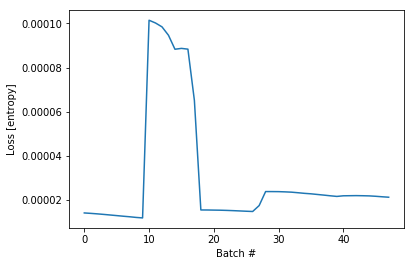

In [40]:
plt.plot(loss_history)
plt.xlabel('Batch #')
plt.ylabel('Loss [entropy]')

In [41]:
# Unfortunately I forgot to save my test indices... so i have to conjure some more..
# Anyways it was very small
outdata['y_test'].shape

(551326, 4)

In [43]:
test_subset = np.random.choice(np.arange(0, outdata['x_test'].shape[0], 1),
                               100000, replace=False)
expected_onehot = tf.convert_to_tensor(outdata['y_test'][test_subset])
print(np.count_nonzero (expected_onehot, axis=0))

[59084  2777 33210  4929]


In [45]:
%time y_pred = model(tf.convert_to_tensor(outdata['x_test'][test_subset], dtype=tf.float32))

KeyboardInterrupt: 

In [46]:
test_subset = np.random.choice(np.arange(0, outdata['x_test'].shape[0], 1),
                               5000, replace=False)
expected_onehot = tf.convert_to_tensor(outdata['y_test'][test_subset])
print(np.count_nonzero (expected_onehot, axis=0))

[2956  136 1669  239]


In [47]:
%time y_pred = model(tf.convert_to_tensor(outdata['x_test'][test_subset], dtype=tf.float32))

CPU times: user 12.1 s, sys: 6.4 s, total: 18.5 s
Wall time: 25.8 s


In [48]:
print(Counter(np.argmax(y_pred, axis=1)))

Counter({1: 4999, 0: 1})


In [49]:
test_subset = np.random.choice(np.arange(0, outdata['x_test'].shape[0], 1),
                               10000, replace=False)
expected_onehot = tf.convert_to_tensor(outdata['y_test'][test_subset])
print(np.count_nonzero (expected_onehot, axis=0))

[5898  269 3358  475]


In [50]:
%time y_pred = model(tf.convert_to_tensor(outdata['x_test'][test_subset], dtype=tf.float32))

CPU times: user 28.3 s, sys: 14.5 s, total: 42.8 s
Wall time: 33.7 s


In [51]:
print(Counter(np.argmax(y_pred, axis=1)))

Counter({1: 9994, 0: 6})


In [ ]:
# Crap.